In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

print("Libraries imported.")
print(tf.__version__)

Libraries imported.
2.3.1


In [3]:
path = "../input/toshima-data/toshimaku_data_norm.csv"

toshima_data = pd.read_csv(path, index_col=0)

In [4]:
dataset = toshima_data.copy()
dataset.head()

,Nearest stationFDistance(minute),Area(m^2),Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Building Age,Transaction-price(total)
0,0.08,0.002513,1.0,0.454545,0.472973,0.002578
1,0.11,0.005025,1.0,0.272727,0.135135,0.003714
2,0.09,0.005025,1.0,0.363636,0.108108,0.006442
3,0.10,0.005025,1.0,0.272727,0.216216,0.003032
4,0.11,0.005025,1.0,0.272727,0.135135,0.003942


In [6]:
# features

X = dataset.iloc[:, :5]
X.head()

,Nearest stationFDistance(minute),Area(m^2),Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Building Age
0,0.08,0.002513,1.0,0.454545,0.472973
1,0.11,0.005025,1.0,0.272727,0.135135
2,0.09,0.005025,1.0,0.363636,0.108108
3,0.10,0.005025,1.0,0.272727,0.216216
4,0.11,0.005025,1.0,0.272727,0.135135


In [7]:
# labels

Y = dataset.iloc[:, -1]
Y.head()

0    0.002578
1    0.003714
2    0.006442
3    0.003032
4    0.003942
Name: Transaction-price(total), dtype: float64

In [8]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (8045, 5)
Y_arr shape:  (8045,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.1, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (7240, 5)
y_train shape:  (7240,)
X_test shape:  (805, 5)
y_test shape:  (805,)


In [13]:
def toshimaku_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = toshimaku_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = toshimaku_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)

Epoch 1/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 2/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 3/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 4/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 5/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 7/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 8/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 9/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 10/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.002

227/227 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 9.8056e-04
Epoch 81/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 9.7843e-04
Epoch 82/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 9.7630e-04
Epoch 83/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 9.7402e-04
Epoch 84/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 9.7208e-04
Epoch 85/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 9.7022e-04
Epoch 86/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 9.6824e-04
Epoch 87/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 9.6627e-04
Epoch 88/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 9.6432e-04
Epoch 89/1000
227/227 [============================

227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.6167e-04
Epoch 157/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.6043e-04
Epoch 158/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.5923e-04
Epoch 159/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.5793e-04
Epoch 160/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.5664e-04
Epoch 161/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.5536e-04
Epoch 162/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.5421e-04
Epoch 163/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.5298e-04
Epoch 164/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.5175e-04
Epoch 165/1000
227/227 [===================

Epoch 232/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.8381e-04
Epoch 233/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.8293e-04
Epoch 234/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.8210e-04
Epoch 235/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.8113e-04
Epoch 236/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.8030e-04
Epoch 237/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.7946e-04
Epoch 238/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.7862e-04
Epoch 239/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.7774e-04
Epoch 240/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.7683e-04
Epoch 241/1000
227/227 [====

Epoch 308/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.2882e-04
Epoch 309/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.2818e-04
Epoch 310/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.2750e-04
Epoch 311/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.2685e-04
Epoch 312/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.2621e-04
Epoch 313/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.2551e-04
Epoch 314/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.2479e-04
Epoch 315/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.2415e-04
Epoch 316/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.2350e-04
Epoch 317/1000
227/227 [====

Epoch 384/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.8132e-04
Epoch 385/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.8080e-04
Epoch 386/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.8019e-04
Epoch 387/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7966e-04
Epoch 388/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7904e-04
Epoch 389/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7844e-04
Epoch 390/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7776e-04
Epoch 391/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7713e-04
Epoch 392/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7657e-04
Epoch 393/1000
227/227 [====

Epoch 460/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.4676e-04
Epoch 461/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.4640e-04
Epoch 462/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.4605e-04
Epoch 463/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.4566e-04
Epoch 464/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.4527e-04
Epoch 465/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.9932e-04 - val_loss: 6.4479e-04
Epoch 466/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.9853e-04 - val_loss: 6.4436e-04
Epoch 467/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.9768e-04 - val_loss: 6.4403e-04
Epoch 468/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.9681e-04 - val_loss: 6.4360e-04
Epoch 469/10

227/227 [==============================] - 0s 1ms/step - loss: 9.4302e-04 - val_loss: 6.1875e-04
Epoch 534/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.4226e-04 - val_loss: 6.1841e-04
Epoch 535/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.4155e-04 - val_loss: 6.1803e-04
Epoch 536/1000
227/227 [==============================] - 0s 2ms/step - loss: 9.4085e-04 - val_loss: 6.1767e-04
Epoch 537/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.4011e-04 - val_loss: 6.1731e-04
Epoch 538/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.3948e-04 - val_loss: 6.1698e-04
Epoch 539/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.3875e-04 - val_loss: 6.1664e-04
Epoch 540/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.3808e-04 - val_loss: 6.1629e-04
Epoch 541/1000
227/227 [==============================] - 0s 1ms/step - loss: 9.3746e-04 - val_loss: 6.1600e-04
Epoch 5

227/227 [==============================] - 0s 1ms/step - loss: 8.9721e-04 - val_loss: 5.9453e-04
Epoch 607/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9665e-04 - val_loss: 5.9424e-04
Epoch 608/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9611e-04 - val_loss: 5.9390e-04
Epoch 609/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9560e-04 - val_loss: 5.9356e-04
Epoch 610/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9506e-04 - val_loss: 5.9320e-04
Epoch 611/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9447e-04 - val_loss: 5.9290e-04
Epoch 612/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9391e-04 - val_loss: 5.9257e-04
Epoch 613/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9338e-04 - val_loss: 5.9229e-04
Epoch 614/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.9283e-04 - val_loss: 5.9199e-04
Epoch 6

227/227 [==============================] - 0s 1ms/step - loss: 8.6035e-04 - val_loss: 5.7245e-04
Epoch 680/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5991e-04 - val_loss: 5.7218e-04
Epoch 681/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5946e-04 - val_loss: 5.7190e-04
Epoch 682/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5896e-04 - val_loss: 5.7158e-04
Epoch 683/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5851e-04 - val_loss: 5.7131e-04
Epoch 684/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5805e-04 - val_loss: 5.7102e-04
Epoch 685/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5757e-04 - val_loss: 5.7075e-04
Epoch 686/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5712e-04 - val_loss: 5.7049e-04
Epoch 687/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.5665e-04 - val_loss: 5.7021e-04
Epoch 6

227/227 [==============================] - 0s 1ms/step - loss: 8.2858e-04 - val_loss: 5.5233e-04
Epoch 753/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2818e-04 - val_loss: 5.5206e-04
Epoch 754/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2781e-04 - val_loss: 5.5178e-04
Epoch 755/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2741e-04 - val_loss: 5.5155e-04
Epoch 756/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2699e-04 - val_loss: 5.5131e-04
Epoch 757/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2658e-04 - val_loss: 5.5101e-04
Epoch 758/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2620e-04 - val_loss: 5.5077e-04
Epoch 759/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2578e-04 - val_loss: 5.5049e-04
Epoch 760/1000
227/227 [==============================] - 0s 1ms/step - loss: 8.2533e-04 - val_loss: 5.5023e-04
Epoch 7

227/227 [==============================] - 0s 1ms/step - loss: 7.9958e-04 - val_loss: 5.3416e-04
Epoch 826/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9918e-04 - val_loss: 5.3393e-04
Epoch 827/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9881e-04 - val_loss: 5.3372e-04
Epoch 828/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9838e-04 - val_loss: 5.3347e-04
Epoch 829/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9806e-04 - val_loss: 5.3323e-04
Epoch 830/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9767e-04 - val_loss: 5.3301e-04
Epoch 831/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9725e-04 - val_loss: 5.3275e-04
Epoch 832/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9692e-04 - val_loss: 5.3252e-04
Epoch 833/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.9652e-04 - val_loss: 5.3229e-04
Epoch 8

227/227 [==============================] - 0s 1ms/step - loss: 7.7293e-04 - val_loss: 5.1803e-04
Epoch 899/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7255e-04 - val_loss: 5.1780e-04
Epoch 900/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7217e-04 - val_loss: 5.1757e-04
Epoch 901/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7182e-04 - val_loss: 5.1735e-04
Epoch 902/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7139e-04 - val_loss: 5.1714e-04
Epoch 903/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7102e-04 - val_loss: 5.1690e-04
Epoch 904/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7070e-04 - val_loss: 5.1666e-04
Epoch 905/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7033e-04 - val_loss: 5.1640e-04
Epoch 906/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.7000e-04 - val_loss: 5.1618e-04
Epoch 9

227/227 [==============================] - 0s 1ms/step - loss: 7.4755e-04 - val_loss: 5.0056e-04
Epoch 972/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4716e-04 - val_loss: 5.0031e-04
Epoch 973/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4680e-04 - val_loss: 5.0006e-04
Epoch 974/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4645e-04 - val_loss: 4.9981e-04
Epoch 975/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4609e-04 - val_loss: 4.9957e-04
Epoch 976/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4580e-04 - val_loss: 4.9930e-04
Epoch 977/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4543e-04 - val_loss: 4.9905e-04
Epoch 978/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4508e-04 - val_loss: 4.9881e-04
Epoch 979/1000
227/227 [==============================] - 0s 1ms/step - loss: 7.4475e-04 - val_loss: 4.9856e-04
Epoch 9

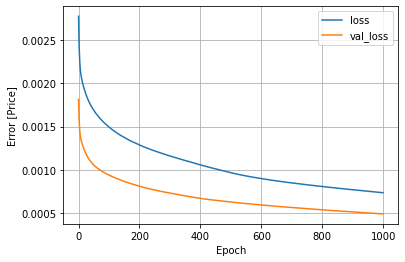

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [34]:
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(10, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    #plt.xlim([y_min, y_max])
    #plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

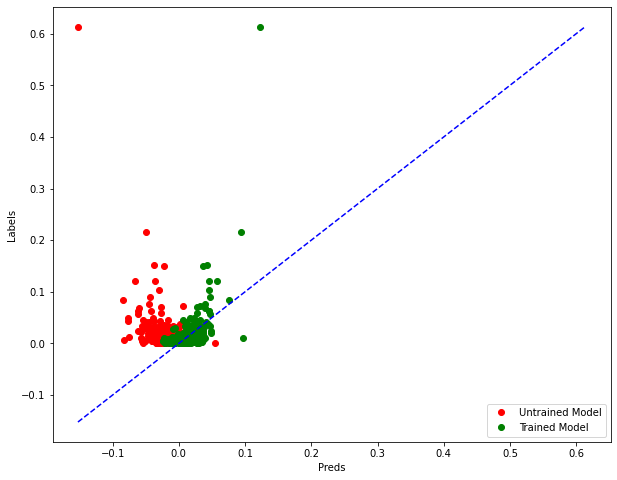

In [35]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)